In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from numpy import log, linspace

from publib import set_style, fix_style # Imports stylesheet. pip install publib
set_style('article') # Sets style.


In [3]:
def PlotLi_v2(llim = 10, ulim = 10**10, npoints = 100):
    """
    Plots approximates number of primes for given range of numbers.
    Does not need seperate Integrate function.
    
    Parameters:
    llim -- Lower limit (default 10)
    ulim -- Upper limit (default 10^10)
    npoints -- Number of values  in which Li(n) is being evalutated (default 100)
    
    """
    
    n_space = np.linspace(llim, ulim, npoints)
    f = lambda x : np.log(x)**-1 
    Li = list(map(lambda n : integrate.quad(f, 2, n)[0], n_space))
    
    plt.figure(figsize = (8, 5))
    ax = plt.subplot()
    ax.plot(n_space,Li, linestyle='solid', markersize=0, linewidth=2.0)
    plt.xlabel(r'$n$')
    plt.ylabel(r'$Li(n)$')
    plt.title(f'Approximate number of primes' )
    plt.show()
    
    

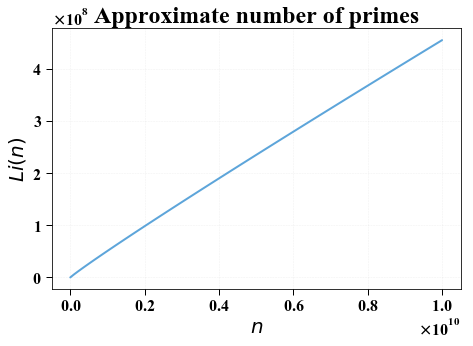

In [4]:
PlotLi_v2()

# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [10]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [41]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf


# Added by me:
import random
import collections
from operator import itemgetter

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

Three examples: 

1: Interbank system (Banking system):
- Nodes: The commercial banks and the central bank ( and maybe all consumers with a bank -account)
- Links: Borrowing and lending between the banks ( and consumers)

2: Facebook 
- Nodes: Are the people and maybe the pages they like 
- Links: Are the connections as friendship or people who like the same pages

3: Disease spreading (as the corona virus)
- Nodes: People with or without the virus 
- Links: The transmition of the virus, only those nodes who obtain the virus are linked. 


> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

Personally im interested in the banking system and how it affect the economy. In the 2008 financial crisis we saw how a crisis in the banking sector ultimately caused a crisis in the entire economy. A well specified network model couldpotentially allow researchers to better assess the risk on the entire economy which ultimately can be used for preventive government banking legislation. 

If we consider a large network between all the commercial banks and the central bank and include how the banking system is connected to the entire economy (both consumer and firms) we have the following.

Nodes: Banks, Central banks, firms, consumers  - note: Banks and central banks will have alot of connections! 
links: Borrowing and lending (transactions)

I speculate we can't really map it out, it is simple too big. 




> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

In chapter 1 there are many examples of how it have allready affected different sciences. An interesting example is how  the data from big social networks as facebook is used to target ads at consumers.


> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

An example is facebook. Say there is N = 10^9 users. And say the average person have maybe 500 - 1000 friends. Even though each node (person) has many connections it is sparce as the total number connections L  = (1000 - 500)/2 * N << L_max = N*(N-1)/2. 


### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

In [53]:
# Solution 5.1.1
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# 1. Add notes and edges
G.add_nodes_from([2, 3, 4, 1])
G.add_edge(1, 2)
G.add_edge(1, 4)
G.add_edge(1, 4)
# 2. print its notes and edges
print(f'The graph G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.')

The graph G has 4 nodes and 2 edges.


After deleting node 3, G has 3 nodes and 2 edges:


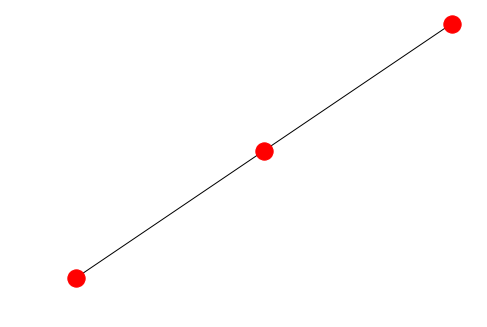

In [54]:
# 3. Remove a node and plot it 
G.remove_node(3)
print(f'After deleting node 3, G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges:')

nx.draw(G)


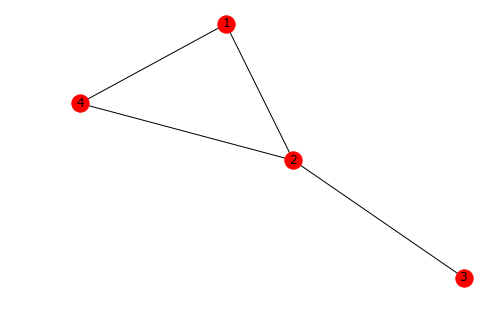

In [40]:
# Answer:
g = nx.Graph()
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
g.add_edges_from(elist)
#g.add_notes_from(['a', 'b', 'c', 'd'])
#g.add_edge_from([('a', 'b'), ('a', 'c')])

nx.draw(g, with_labels = True)

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

An ER network is a random network where we first initialize all N nodes and then with a probability p we independently draw between all the N nodes. 

The Erdős–Rényi network:


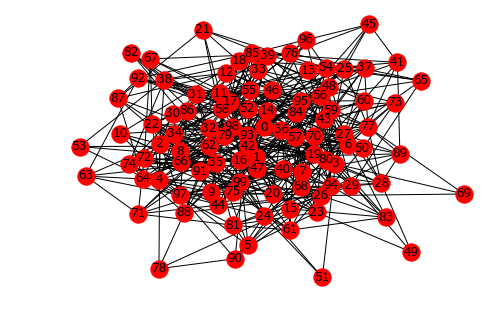

In [61]:
G_ER = nx.gnp_random_graph(100, 0.1, seed = 123)
print('The Erdős–Rényi network:')
nx.draw(G_ER, with_labels = True)

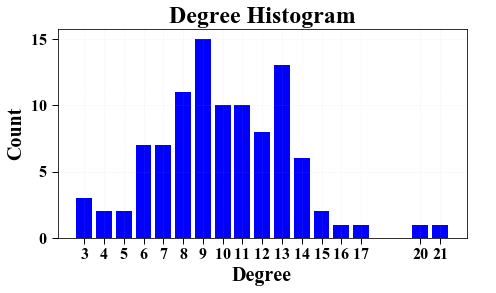

In [64]:
import collections
import matplotlib.pyplot as plt
def plt_hist(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots(figsize = (8, 4))
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d for d in deg])
    ax.set_xticklabels(deg)
    plt.axes([0.4, 0.4, 0.5, 0.5])
    plt.axis('off')
    plt.show()

plt_hist(G_ER)

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

In [ ]:
The BA network 

The Barabási–Albert network


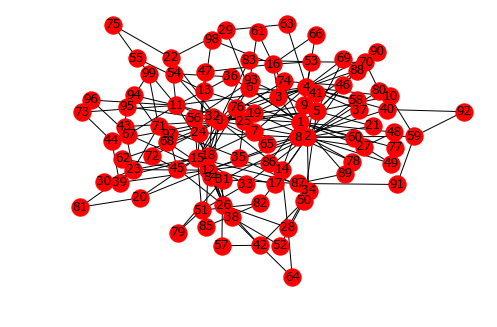

In [60]:
G_BA = nx.barabasi_albert_graph(100, 2, seed = 123)
print('The Barabási–Albert network:')
nx.draw(G_BA, with_labels = True)

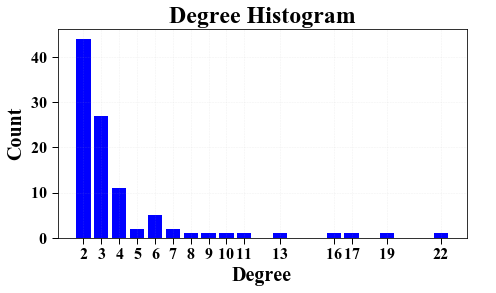

In [16]:
plt_hist(G_BA)

The main difference is in the degree distribution with the ER degree - distribution centered around 10 connections and the degree distribution of the BA is highly right-skewed with a mean around 2 or 3. 

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [66]:
import pandas as pd
data = pd.read_csv(
    "facebook-wall.txt.ANON",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(2)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [21]:
def data_inbetweentimes(t0, t1):
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph) 
    return G_t

# Get times for the last 365 days
t0 = data.timestamp.max() - 86400 * 365
t1 = data.timestamp.max()

G_data =  data_inbetweentimes(t0, t1)
print('Nr of nodes:',G_data.number_of_nodes())
print('Nr of edges:',G_data.number_of_edges())

Nr of nodes: 44397
Nr of edges: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

In [79]:
def Plot_di_degree_distribution(graph):
    in_degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)  # degree sequence
    out_degree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)  # degree sequence
    in_degreeCount = collections.Counter(in_degree_sequence)
    out_degreeCount = collections.Counter(out_degree_sequence)
    del in_degreeCount[0] 
    del out_degreeCount[0]
    
    in_deg, in_cnt = zip(*in_degreeCount.items())
    out_deg, out_cnt = zip(*out_degreeCount.items())
    
    fig, ax = plt.subplots(1)
    plt.scatter(in_deg, in_cnt, marker='.', color='b', label = 'in-degrees')
    plt.scatter(out_deg, out_cnt, marker='.', color='r', label = 'out-degrees')
   
    plt.title(f'Degree distribution')
    plt.xlabel('degree')                                                                                                             
    plt.xscale('log')                                                                                                                
    plt.ylabel('frequency')                                                                                                          
    plt.yscale('log')   
    plt.legend()        
    
                                                                                                                         
                                                                                                   
    plt.show()

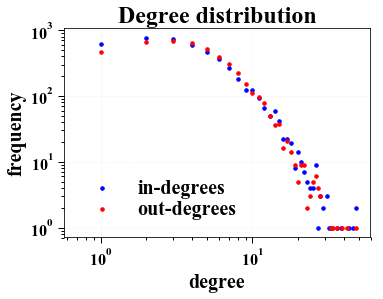

In [80]:
Plot_di_degree_distribution(G_data)

The degree distribution of the facebook data resembles the BA network in that a few nodes (hubs) have a very high degree compared with most nodes. 

In [22]:
import numpy as np
def double_plt_hist(graph):
    in_degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)  # degree sequence
    out_degree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)  # degree sequence
    in_degreeCount = collections.Counter(in_degree_sequence)
    out_degreeCount = collections.Counter(out_degree_sequence)
    del in_degreeCount[0]
    del out_degreeCount[0]
    print(in_degreeCount)
    print(out_degreeCount)
    in_deg, in_cnt = zip(*in_degreeCount.items())
    out_deg, out_cnt = zip(*out_degreeCount.items())
   
    in_deg, in_cnt = np.log(in_deg),  np.log(in_cnt)
    out_deg, out_cnt = np.log(out_deg),  np.log(out_cnt)

    fig, ax = plt.subplots(1)
    plt.bar(in_deg, in_cnt, width=0.80, color='b', alpha=1)
    plt.bar(out_deg, out_cnt, width=0.80, color='r', alpha=0.3)

    plt.title("In and Out Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.legend({'In degree', 'Out degree'})
    plt.axes([0.4, 0.4, 0.5, 0.5])
    #plt.axis(0, 50)
    plt.axis('off')
    plt.show()
    


Counter({1: 10467, 2: 6107, 3: 4163, 4: 2886, 5: 2133, 6: 1735, 7: 1332, 8: 1084, 9: 934, 10: 776, 11: 621, 12: 583, 13: 487, 14: 398, 15: 330, 16: 315, 17: 251, 18: 191, 19: 187, 20: 172, 21: 149, 22: 126, 23: 105, 24: 94, 25: 87, 26: 86, 28: 61, 29: 58, 27: 58, 30: 53, 32: 48, 34: 41, 31: 38, 35: 32, 33: 31, 38: 25, 36: 25, 42: 24, 39: 23, 41: 21, 43: 19, 37: 18, 44: 17, 50: 15, 51: 14, 46: 12, 40: 12, 53: 11, 57: 9, 63: 8, 60: 8, 55: 8, 47: 8, 64: 7, 52: 7, 49: 7, 74: 6, 56: 6, 45: 6, 65: 5, 59: 5, 54: 5, 48: 5, 70: 4, 91: 3, 77: 3, 76: 3, 75: 3, 69: 3, 66: 3, 62: 3, 107: 2, 103: 2, 96: 2, 88: 2, 87: 2, 86: 2, 85: 2, 81: 2, 72: 2, 68: 2, 67: 2, 58: 2, 188: 1, 153: 1, 147: 1, 131: 1, 116: 1, 114: 1, 109: 1, 100: 1, 98: 1, 97: 1, 95: 1, 94: 1, 93: 1, 92: 1, 89: 1, 84: 1, 80: 1, 73: 1, 71: 1, 61: 1})
Counter({1: 11513, 2: 6596, 3: 4531, 4: 3193, 5: 2509, 6: 1911, 7: 1490, 8: 1244, 9: 1051, 10: 825, 11: 737, 12: 572, 13: 472, 14: 433, 15: 363, 16: 313, 17: 296, 18: 224, 19: 184, 20: 173

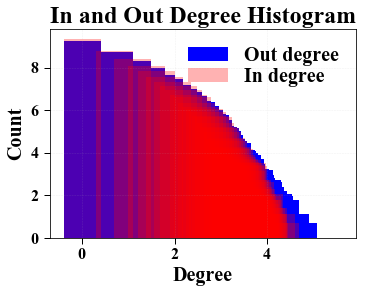

In [23]:
double_plt_hist(G_data)

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

<function matplotlib.pyplot.show(*args, **kw)>

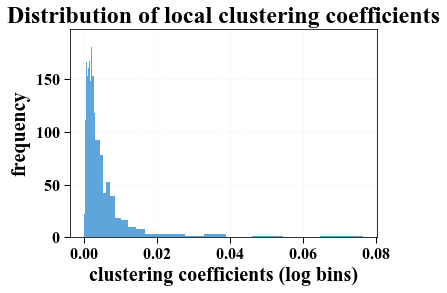

In [81]:
nodes = G_data.nodes()
cluster_coef = nx.clustering(G_data, nodes = nodes, weight = 'weight')
cluster_coef_seq= sorted([d for n, d in cluster_coef.items()], reverse=True)

plt.figure(1)   
plt.title(f'Distribution of local clustering coefficients')
plt.xlabel('clustering coefficients (log bins)')                                                                                                                                                                                                                   
plt.ylabel('frequency')                                                                                                          
 
data = list(filter(lambda x: x > 0, list(cluster_coef.values()))) # Removes negative values.

plt.hist(data, bins = 10 ** np.linspace(np.log10(min(data)), np.log10(max(data))))
plt.show

The local clustering coefficient measures to what degree nodes are highly linked neighboring nodes. Real-world networks tend to have this proberty. Larger coefficient means more clustering (max = 1).

The figure show that the distribution of local clustering coefficients is highly right-skewed, meaning that must nodes are modestly connected and a few are higly connected. By this metric, the BA network is again the best fit.

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [83]:

# We remove all nodes that have a degree lower than 21 and we remove additional edges if their weight is less or equal to 1.

remove = {node:v for node,v in G_data.degree() if v < 21}
G_data.remove_nodes_from(remove)

# G_data nr of nodes and links 
print('Number of nodes:',G_data.number_of_nodes())
print('Number of edges:',G_data.number_of_edges())

# Remove additional edges
esmall = [(u, v) for (u, v, d) in G_data.edges(data=True) if d['weight'] <= 1]
G_data.remove_edges_from(esmall)
print('New number of nodes:',G_data.number_of_nodes())
print('New number of edges:',G_data.number_of_edges())




Number of nodes: 36
Number of edges: 155
New number of nodes: 36
New number of edges: 155


In [ ]:
import netwulf as nw 
nw.visualize(G_data)

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 62963)
Traceback (most recent call last):
  File "C:\Users\magnu\Anaconda3\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\Users\magnu\Anaconda3\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "C:\Users\magnu\Anaconda3\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\Users\magnu\Anaconda3\lib\http\server.py", line 646, in __init__
    super().__init__(*args, **kwargs)
  File "C:\Users\magnu\Anaconda3\lib\socketserver.py", line 720, in __init__
    self.handle()
  File "C:\Users\magnu\Anaconda3\lib\http\server.py", line 426, in handle
    self.handle_one_request()
  File "C:\Users\magnu\Anaconda3\lib\http\server.py", line 414, in handle_one_request
    method()
  File "C:\Users\mag